In [1]:
#Alejandro Gonzalez alejandro.gonzalez10@utp.ac.pa
#Jordy Rosales jordy.rosales@utp.ac.pa
#Alfonso Rodriguez alfonso.rodriguez1@ut.ac.pa

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
#Guardar los datos del txt en la varible x.
x=pd.read_table(filepath_or_buffer=("Source/DataProblema4log/xlog.txt"), sep="   ", names=('Examen 1','Examen 2')) 
x

C:\Users\adga2\AppData\Local\Temp\ipykernel_19756\2071667527.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  x=pd.read_table(filepath_or_buffer=("Source/DataProblema4log/xlog.txt"), sep="   ", names=('Examen 1','Examen 2'))


,Examen 1,Examen 2
0,55.5,69.5
1,41.0,81.5
2,53.5,86.0
3,46.0,84.0
4,41.0,73.5
...,...,...
75,20.0,65.5
76,38.0,65.0
77,18.5,74.5
78,16.0,72.5


In [4]:
x.insert(0,'Intersecto',1)  #Insertar intersecto, es decir, el Vector de 1.
x

,Intersecto,Examen 1,Examen 2
0,1,55.5,69.5
1,1,41.0,81.5
2,1,53.5,86.0
3,1,46.0,84.0
4,1,41.0,73.5
...,...,...,...
75,1,20.0,65.5
76,1,38.0,65.0
77,1,18.5,74.5
78,1,16.0,72.5


In [5]:
#Guardar los datos del txt CSV en la varible y.
y=pd.read_table(filepath_or_buffer=("Source/DataProblema4log/ylog.txt"), sep="   ", names=('y',)) 
y

C:\Users\adga2\AppData\Local\Temp\ipykernel_19756\3481729057.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  y=pd.read_table(filepath_or_buffer=("Source/DataProblema4log/ylog.txt"), sep="   ", names=('y',))


,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
75,0.0
76,0.0
77,0.0
78,0.0


In [6]:
positivos=x.loc[y['y'] == 1]  #Almacenar los datos de los examenes en X, con relacion a los aprobados en Y.
negativos=x.loc[y['y'] == 0]  #Almacenar los datos de los examenes en X, con relacion a los reprobados en Y.

ypos=y.loc[y['y']==1]    #Almacenar los aprobados en Y.
yneg=y.loc[y['y']==0]    #Almacenar los reprobados en Y.

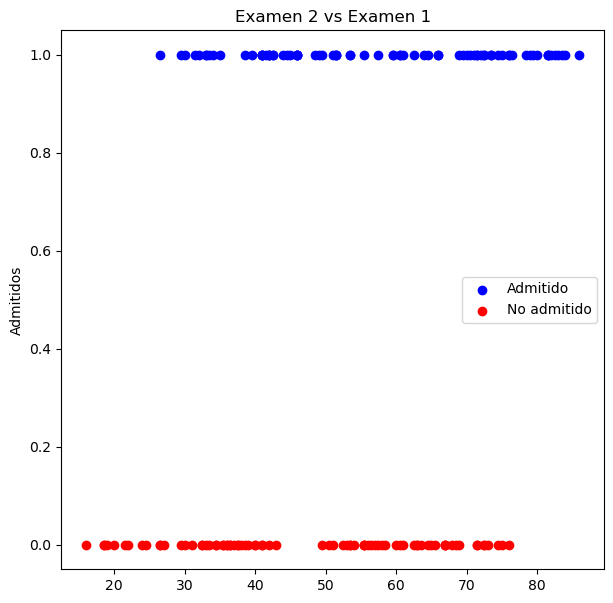

In [7]:
plt.figure(figsize=(7,7))   #Graficar.
plt.scatter(positivos['Examen 1'], ypos, color='blue', label='Admitido')
plt.scatter(positivos['Examen 2'], ypos, color='blue')
plt.scatter(negativos['Examen 1'], yneg, color='red', label='No admitido')
plt.scatter(negativos['Examen 2'], yneg, color='red')
plt.ylabel('Admitidos')
plt.legend()
plt.title('Examen 2 vs Examen 1')
plt.show()

In [8]:
def sigmoide_general(t, w0, w1):  #Creacion de la funcion sigmoide.
    sigma=1/(1+np.exp(-(w0+(w1*t))))
    return sigma
xsig=np.linspace(0,100)
grafsig=sigmoide_general(xsig, -7.71, 0.15) #Estos pesos se encontraron despues con el modelo de regresion de skt.

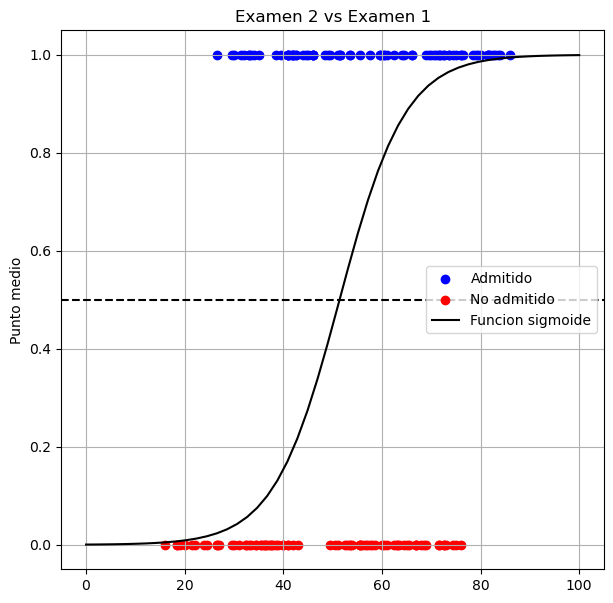

In [9]:
plt.figure(figsize=(7,7))   #Graficar con los resultados de los pesos del modelo de regresion evaluados en la funcion sigmoide.
plt.scatter(positivos['Examen 1'], ypos, color='blue', label='Admitido')
plt.scatter(positivos['Examen 2'], ypos, color='blue')
plt.scatter(negativos['Examen 1'], yneg, color='red', label='No admitido')
plt.scatter(negativos['Examen 2'], yneg, color='red')
plt.plot(xsig, grafsig, color='black', label='Funcion sigmoide')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.grid(True)
plt.ylabel('Punto medio')
plt.legend()
plt.title('Examen 2 vs Examen 1')
plt.show()

In [10]:
modelo = LogisticRegression(solver='newton-cg', max_iter=30)  #Creacion del modelo con el Newton solver.
modelo.fit(x.values, y.values.ravel())  #Ravel acomoda la dimension de la data a la optima.

LogisticRegression(max_iter=30, solver='newton-cg')

In [11]:
print('w0:', modelo.intercept_[0])    #Obtener el peso del intercepto.
print('w1:', modelo.coef_[0][0])      #Obtener el peso del examen 1.
print('w2:', modelo.coef_[0][1])      #Obtener el peso del examen 2.

w0: -16.34182683819949
w1: -7.704059105106151e-15
w2: 0.14800697866615786


In [12]:
alumno = np.array([1, 20, 80]).reshape(1, -1)  #Validar la prediccion con los datos en el modelo entrenado.
prob = modelo.predict_proba(alumno)
print('Probabilidad de admisión:', (prob[0][1])*100)
print('Probabilidad de no admisión:', (prob[0][0])*100)

Probabilidad de admisión: 33.23653466891662
Probabilidad de no admisión: 66.76346533108338
